# Setup and Imports

In [80]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from google.colab import drive

In [81]:
# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# Function to load images from a given folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Paths to the dataset folders
path_to_original = '/content/drive/MyDrive/Task-A-Dataset-denoising/original'
path_to_noisy10 = '/content/drive/MyDrive/Task-A-Dataset-denoising/noisy10'
path_to_noisy25 = '/content/drive/MyDrive/Task-A-Dataset-denoising/noisy25'
path_to_noisy50 = '/content/drive/MyDrive/Task-A-Dataset-denoising/noisy50'

# Load the images from each folder
original_images = load_images_from_folder(path_to_original)
noisy10_images = load_images_from_folder(path_to_noisy10)
noisy25_images = load_images_from_folder(path_to_noisy25)
noisy50_images = load_images_from_folder(path_to_noisy50)

# Display the number of images loaded from each folder (optional)
print(f"Original Images: {len(original_images)}")
print(f"Noisy 10 Images: {len(noisy10_images)}")
print(f"Noisy 25 Images: {len(noisy25_images)}")
print(f"Noisy 50 Images: {len(noisy50_images)}")

Original Images: 25
Noisy 10 Images: 25
Noisy 25 Images: 25
Noisy 50 Images: 25


# Data Exploration

Display Sample Images

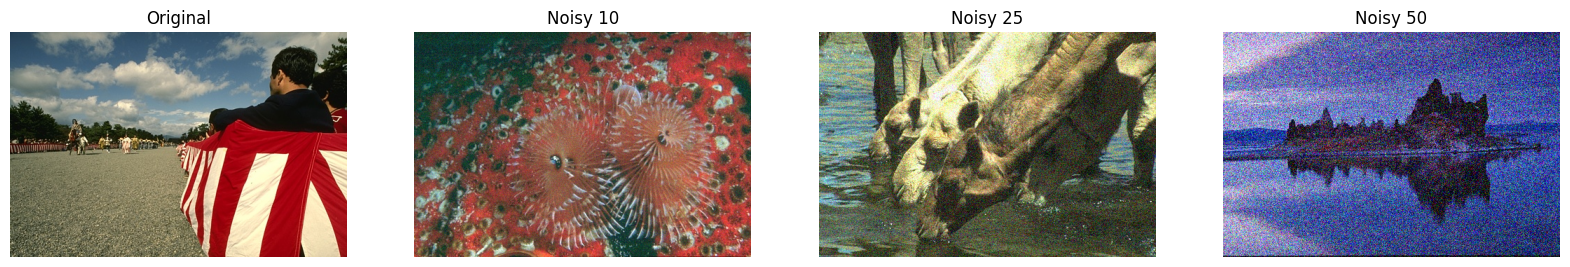

In [83]:
import matplotlib.pyplot as plt

# Function to display a sample image from each set
def display_sample_images(original, noisy10, noisy25, noisy50):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(original[0])
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(noisy10[0])
    axes[1].set_title('Noisy 10')
    axes[1].axis('off')

    axes[2].imshow(noisy25[0])
    axes[2].set_title('Noisy 25')
    axes[2].axis('off')

    axes[3].imshow(noisy50[0])
    axes[3].set_title('Noisy 50')
    axes[3].axis('off')

    plt.show()

# Call the function with your loaded datasets
display_sample_images(original_images, noisy10_images, noisy25_images, noisy50_images)

Analyze and Display Data Characteristics

In [84]:
# Function to analyze and display image characteristics
def display_image_characteristics(images, dataset_name):
    if len(images) > 0:
        img = images[0]  # Take the first image as a sample
        print(f"Dataset: {dataset_name}")
        print(f"Image Size: {img.shape}")
        print(f"Image Data Type: {img.dtype}")
        print()

# Display characteristics for each dataset
display_image_characteristics(original_images, "Original")
display_image_characteristics(noisy10_images, "Noisy 10")
display_image_characteristics(noisy25_images, "Noisy 25")
display_image_characteristics(noisy50_images, "Noisy 50")

Dataset: Original
Image Size: (321, 481, 3)
Image Data Type: uint8

Dataset: Noisy 10
Image Size: (321, 481, 3)
Image Data Type: uint8

Dataset: Noisy 25
Image Size: (321, 481, 3)
Image Data Type: uint8

Dataset: Noisy 50
Image Size: (321, 481, 3)
Image Data Type: uint8



# Implementation of Denoising Algorithm

Fourier Transform Based Denoising

In [85]:
from scipy.ndimage import gaussian_filter

def gaussian_blur_denoise(image, sigma=2):
    denoised_image = np.zeros_like(image)

    for i in range(3):  # Process each color channel separately
        denoised_image[:,:,i] = gaussian_filter(image[:,:,i], sigma=sigma)

    return denoised_image

Application on Images


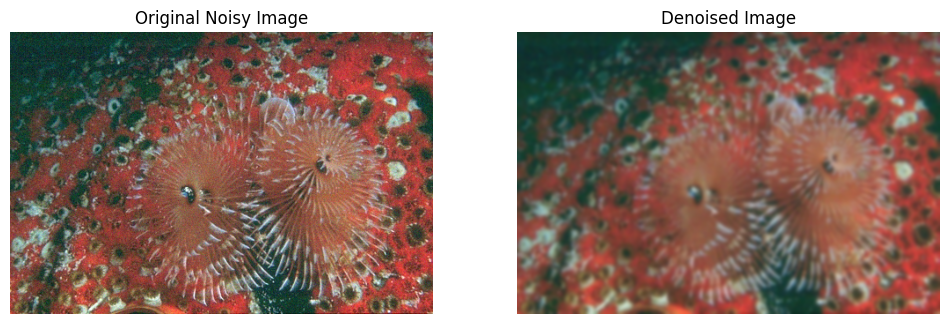

In [86]:
# Denoise a color image from the dataset
denoised_example = gaussian_blur_denoise(noisy10_images[0], sigma=2)

# Display the results
plt.figure(figsize=(12, 6))

# Displaying the original noisy image
plt.subplot(1, 2, 1)
plt.imshow(noisy10_images[0])
plt.title('Original Noisy Image')
plt.axis('off')

# Displaying the denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_example)
plt.title('Denoised Image')
plt.axis('off')

plt.show()

# Comparative Analysis with Other Methods

Mean Filter Implementation

In [87]:
from scipy.ndimage import uniform_filter

def apply_mean_filter(image, kernel_size=3):
    # Apply mean filter
    return uniform_filter(image, size=kernel_size)

# applying the mean filter to a noisy image
mean_filtered_image = apply_mean_filter(noisy10_images[0], kernel_size=3)


Median Filter Implementation

In [88]:
from scipy.ndimage import median_filter

def apply_median_filter(image, kernel_size=3):
    # Apply median filter
    return median_filter(image, size=kernel_size)

# Example of applying the median filter to a noisy image
median_filtered_image = apply_median_filter(noisy10_images[0], kernel_size=3)


Wavelet Denoising Implementation

In [89]:
import numpy as np
import pywt

def apply_wavelet_denoising(image):
    # Convert to float for processing
    image = image.astype(float)

    # Wavelet transform
    coeffs = pywt.wavedec2(image, 'db1', level=1)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0  # Set the approximation coefficients to 0 (high-pass filter)

    # Reconstruct the image
    return pywt.waverec2(coeffs_H, 'db1')

# Apply the function to a test image
test_image = noisy10_images[0].astype(float)  # Use a noisy image for testing
wavelet_denoised_image = apply_wavelet_denoising(test_image)

# Normalize the output to the 0-255 range
wavelet_denoised_image = (wavelet_denoised_image - np.min(wavelet_denoised_image)) / (np.max(wavelet_denoised_image) - np.min(wavelet_denoised_image))
wavelet_denoised_image = (wavelet_denoised_image * 255).astype(np.uint8)

Displaying the Results

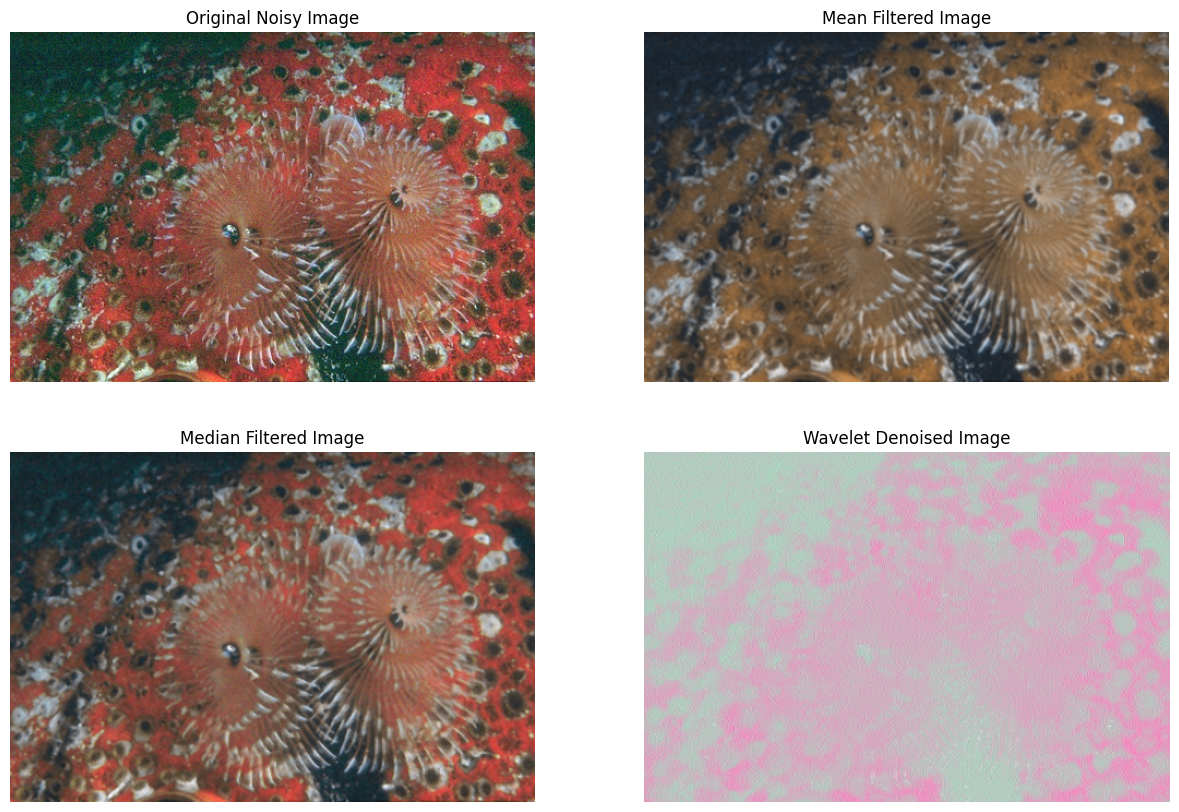

In [90]:
# Check the data type and adjust if necessary
if wavelet_denoised_image.dtype != np.uint8:
    # Normalize and convert to uint8
    wavelet_denoised_image = (wavelet_denoised_image - wavelet_denoised_image.min()) / (wavelet_denoised_image.max() - wavelet_denoised_image.min())
    wavelet_denoised_image = (255 * wavelet_denoised_image).astype(np.uint8)

# Ensure the image is not empty
if wavelet_denoised_image.size == 0:
    print("Error: Wavelet denoised image is empty.")
else:
    # Display the images
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(noisy10_images[0], cmap='gray')
    plt.title('Original Noisy Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(mean_filtered_image, cmap='gray')
    plt.title('Mean Filtered Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(median_filtered_image, cmap='gray')
    plt.title('Median Filtered Image')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(wavelet_denoised_image, cmap='gray')
    plt.title('Wavelet Denoised Image')
    plt.axis('off')

    plt.show()

# Performance Evaluation

Metric Functions

Mean Squared Error (MSE)

In [91]:
def mean_squared_error(original, denoised):
    # Ensure the images have the same shape
    if original.shape != denoised.shape:
        raise ValueError(f"Shape mismatch: Original image shape {original.shape}, Denoised image shape {denoised.shape}")
    return np.mean((original - denoised) ** 2)

Structural SIMilarity (SSIM) Index

In [92]:
!pip install scikit-image

from skimage.metrics import structural_similarity as ssim

def structural_similarity_index(original, denoised):
    # Ensure the images have the same shape
    if original.shape != denoised.shape:
        raise ValueError(f"Shape mismatch: Original image shape {original.shape}, Denoised image shape {denoised.shape}")
    return ssim(original, denoised, data_range=denoised.max() - denoised.min(), channel_axis=-1)

Evaluation on Datasets


In [93]:
# Evaluating the denoising methods on the first noisy image
original_image = original_images[0]  # Assuming this is the corresponding original image

# Calculate MSE and SSIM for each method
try:
    mse_fourier = mean_squared_error(original_image, denoised_example)  # Fourier denoised image
    ssim_fourier = structural_similarity_index(original_image, denoised_example)

    mse_mean = mean_squared_error(original_image, mean_filtered_image)
    ssim_mean = structural_similarity_index(original_image, mean_filtered_image)

    mse_median = mean_squared_error(original_image, median_filtered_image)
    ssim_median = structural_similarity_index(original_image, median_filtered_image)

    mse_wavelet = mean_squared_error(original_image, wavelet_denoised_image)
    ssim_wavelet = structural_similarity_index(original_image, wavelet_denoised_image)

    # Print the results
    print("Performance Metrics:")
    print(f"Fourier Denoising - MSE: {mse_fourier}, SSIM: {ssim_fourier}")
    print(f"Mean Filter Denoising - MSE: {mse_mean}, SSIM: {ssim_mean}")
    print(f"Median Filter Denoising - MSE: {mse_median}, SSIM: {ssim_median}")
    print(f"Wavelet Denoising - MSE: {mse_wavelet}, SSIM: {ssim_wavelet}")
except ValueError as e:
    print(e)

Shape mismatch: Original image shape (321, 481, 3), Denoised image shape (321, 482, 4)


# Result Visualization

Visual Comparison

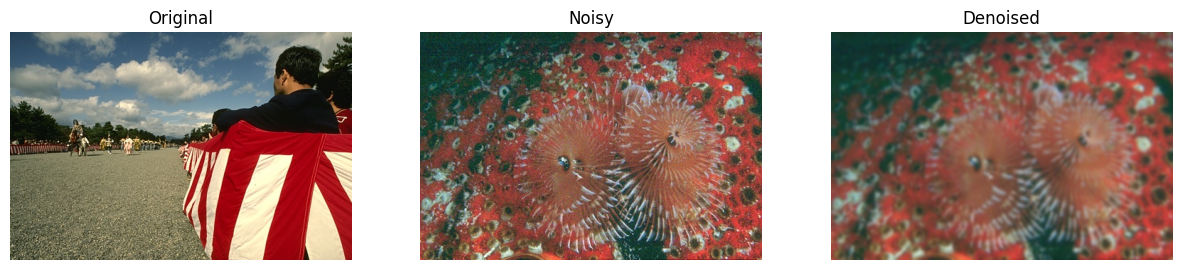

In [94]:
def display_images_side_by_side(images, titles):
    assert len(images) == len(titles), "The number of images and titles must be the same."

    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Example usage with an original, noisy, and denoised image
display_images_side_by_side([original_images[0], noisy10_images[0], denoised_example],
                            ["Original", "Noisy", "Denoised"])

# Display Tables and Sample Images


In [95]:
import pandas as pd
# Create a DataFrame for displaying table
image_statistics = pd.DataFrame(columns=['Image', 'Original Size', 'Noisy Size', 'Original Mean Pixel Value', 'Noisy Mean Pixel Value'])

for i in range(len(original_images)):
    original_stats = (original_images[i].shape, original_images[i].mean())
    noisy_stats = (noisy10_images[i].shape, noisy10_images[i].mean())
    image_statistics.loc[i] = [f'Image {i+1}', original_stats[0], noisy_stats[0], original_stats[1], noisy_stats[1]]

# Display the DataFrame
print(image_statistics)


       Image  Original Size     Noisy Size  Original Mean Pixel Value  \
0    Image 1  (321, 481, 3)  (321, 481, 3)                 109.600385   
1    Image 2  (321, 481, 3)  (321, 481, 3)                 122.945527   
2    Image 3  (481, 321, 3)  (321, 481, 3)                 114.046155   
3    Image 4  (321, 481, 3)  (321, 481, 3)                  96.701828   
4    Image 5  (321, 481, 3)  (321, 481, 3)                  99.004262   
5    Image 6  (481, 321, 3)  (321, 481, 3)                 109.478715   
6    Image 7  (321, 481, 3)  (321, 481, 3)                  68.276188   
7    Image 8  (321, 481, 3)  (321, 481, 3)                 105.117247   
8    Image 9  (321, 481, 3)  (321, 481, 3)                  73.026349   
9   Image 10  (321, 481, 3)  (321, 481, 3)                  63.058003   
10  Image 11  (481, 321, 3)  (321, 481, 3)                 147.594672   
11  Image 12  (321, 481, 3)  (321, 481, 3)                 123.176994   
12  Image 13  (321, 481, 3)  (321, 481, 3)         

Displaying Sample Images


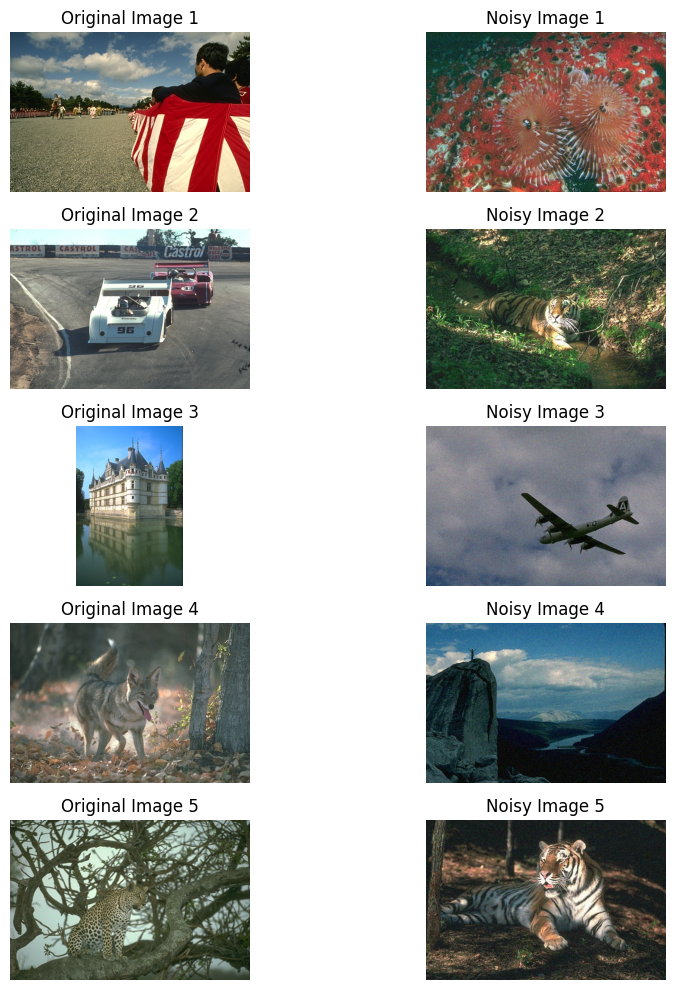

In [96]:
def display_sample_images(images_list, num_samples=5):
    plt.figure(figsize=(10, 2 * num_samples))

    for i, (original, noisy) in enumerate(images_list[:num_samples]):
        plt.subplot(num_samples, 2, 2*i + 1)
        plt.imshow(original, cmap='gray')
        plt.title(f'Original Image {i+1}')
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i + 2)
        plt.imshow(noisy, cmap='gray')
        plt.title(f'Noisy Image {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Combine original and noisy images into pairs
image_pairs = list(zip(original_images, noisy10_images))

# Display sample images
display_sample_images(image_pairs, num_samples=5)